In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
customer=pd.read_csv('Ecommerce Customers')

In [4]:
customer.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [6]:
customer.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


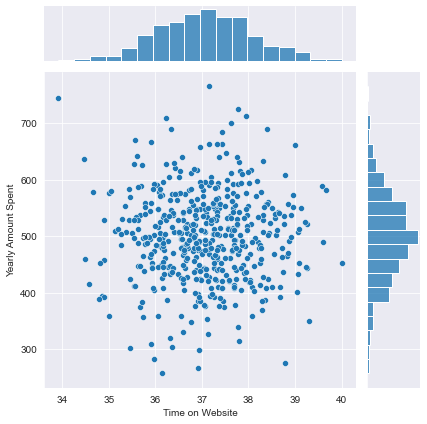

In [13]:
# Use seaborn to create a jointplot to compare the Time on Website and Yearly
# Amount Spent columns. Does 
sns.set_style('darkgrid')
sns.jointplot(data=customer,x='Time on Website',y='Yearly Amount Spent')

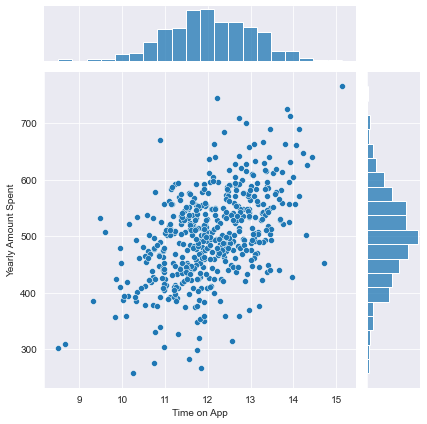

In [14]:
#Do the same but with the Time on App column instead

sns.jointplot(data=customer,x='Time on App',y='Yearly Amount Spent')

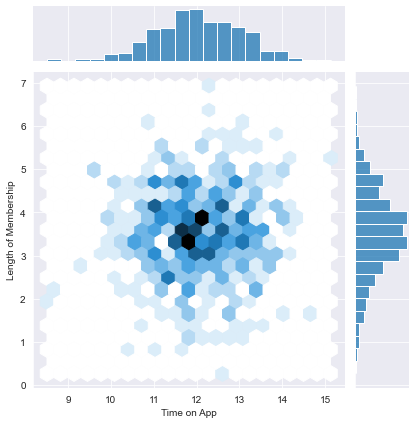

In [15]:
#Use jointplot to create a 2D hex bin plot comparing Time on App and Length
# of Membership

sns.jointplot(data=customer,x='Time on App',y='Length of Membership',kind='hex')

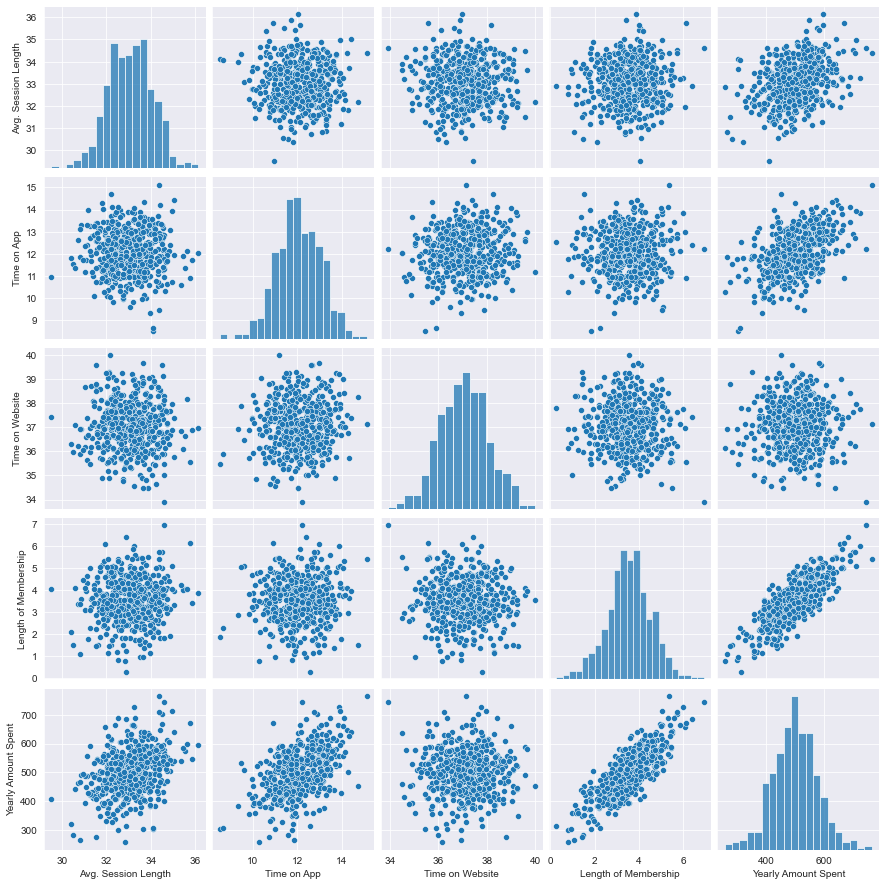

In [16]:
#Use pairplot to recreate the plot below.

sns.pairplot(customer)

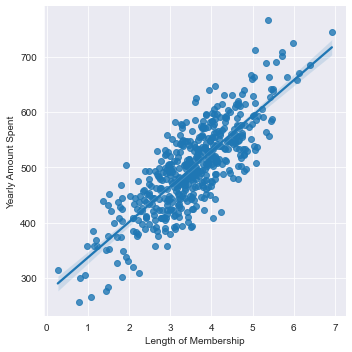

In [17]:
# Create a linear model plot (using seaborn's lmplot) of Yearly Amount Spent vs
# Length of Membership
sns.lmplot(data=customer,x='Length of Membership',y='Yearly Amount Spent')

In [18]:
# Training and Testing Data

y=customer['Yearly Amount Spent']

In [19]:
X=customer[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]

In [20]:
# Use model_selection.train_test_split from sklearn to split the data into 
# training and testing sets. Set test_size=0.3 and random_state=101

from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [22]:
# Training the Model

from sklearn.linear_model import LinearRegression

In [23]:
lm=LinearRegression()

In [24]:
lm.fit(X_train,y_train)

LinearRegression()

In [25]:
print(X_train,y_train)

     Avg. Session Length  Time on App  Time on Website  Length of Membership
202            31.525752    11.340036        37.039514              3.811248
428            31.862741    14.039867        37.022269              3.738225
392            33.258238    11.514949        37.128039              4.662845
86             33.877779    12.517666        37.151921              2.669942
443            33.025020    12.504220        37.645839              4.051382
..                   ...          ...              ...                   ...
63             32.789773    11.670066        37.408748              3.414688
326            33.217188    10.999684        38.442767              4.243813
337            31.827979    12.461147        37.428997              2.974737
11             33.879361    11.584783        37.087926              3.713209
351            32.189845    11.386776        38.197483              4.808320

[350 rows x 4 columns] 202    443.965627
428    556.298141
392    549.13157

In [26]:
print('Coefficients: \n',lm.coef_)

Coefficients: 
 [25.98154972 38.59015875  0.19040528 61.27909654]


In [27]:
# Predicting Test Data

prediction=lm.predict(X_test)

In [28]:
prediction

array([456.44186104, 402.72005312, 409.2531539 , 591.4310343 ,
       590.01437275, 548.82396607, 577.59737969, 715.44428115,
       473.7893446 , 545.9211364 , 337.8580314 , 500.38506697,
       552.93478041, 409.6038964 , 765.52590754, 545.83973731,
       693.25969124, 507.32416226, 573.10533175, 573.2076631 ,
       397.44989709, 555.0985107 , 458.19868141, 482.66899911,
       559.2655959 , 413.00946082, 532.25727408, 377.65464817,
       535.0209653 , 447.80070905, 595.54339577, 667.14347072,
       511.96042791, 573.30433971, 505.02260887, 565.30254655,
       460.38785393, 449.74727868, 422.87193429, 456.55615271,
       598.10493696, 449.64517443, 615.34948995, 511.88078685,
       504.37568058, 515.95249276, 568.64597718, 551.61444684,
       356.5552241 , 464.9759817 , 481.66007708, 534.2220025 ,
       256.28674001, 505.30810714, 520.01844434, 315.0298707 ,
       501.98080155, 387.03842642, 472.97419543, 432.8704675 ,
       539.79082198, 590.03070739, 752.86997652, 558.27

Text(0, 0.5, 'Predicted Y')

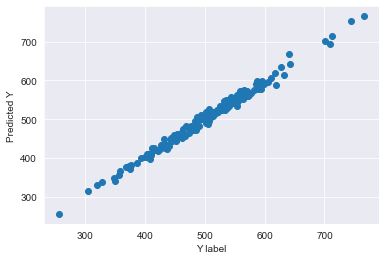

In [30]:
plt.scatter(y_test,prediction)
plt.xlabel('Y label')
plt.ylabel('Predicted Y')

In [33]:
# Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean 
# Squared Error. Refer to the lecture or to Wikipedia for the formulas

from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,prediction))
print('MSE:',metrics.mean_squared_error(y_test,prediction))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE: 7.228148653430832
MSE: 79.81305165097444
RMSE: 8.933815066978633


C:\Users\This pc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Density'>

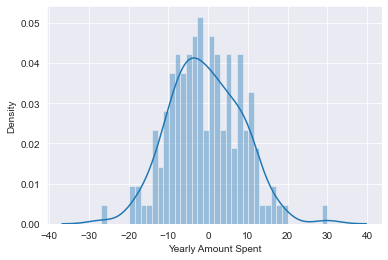

In [34]:
# Plot a histogram of the residuals and make sure it looks normally distributed.
# Use either seaborn distplot, or just plt.hist()

sns.distplot((y_test-prediction),bins=40)

In [36]:
#CONCLUSION

coef= pd.DataFrame(lm.coef_,X.columns)
coef.columns=['Coeffecient']
coef

,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097
